# BÀI TẬP THỰC HÀNH 1: TRỰC QUAN HÓA DỮ LIỆU CHẤT LƯỢNG RƯỢU VANG
Mục tiêu: Thực hành các kỹ năng trực quan hóa dữ liệu đã học bằng cách áp dụng thư viện Matplotlib và Seaborn trên tập dữ liệu winequality-red.csv.

## Bài làm

### 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu
Bước đầu tiên là tải dữ liệu và các thư viện cần thiết vào môi trường làm việc.

In [5]:
# Import các thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu từ file CSV
df_wine = pd.read_csv(r"..\data\winequality-red.csv", encoding='utf-8')


# Kiểm tra 5 dòng dữ liệu đầu tiên để đảm bảo dữ liệu được tải đúng
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Trực quan hóa dữ liệu với thư viện Matplotlib
Chúng ta sẽ sử dụng Matplotlib để vẽ biểu đồ thể hiện số lượng rượu vang cho mỗi mức chất lượng.

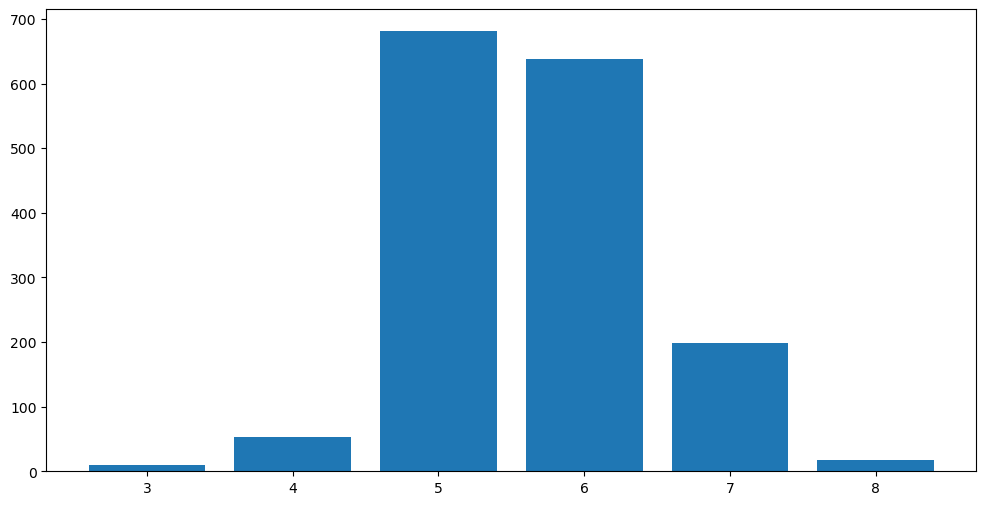

In [2]:
# ----- Case 1: Basic (Vẽ biểu đồ cơ bản) -----

# Bước 1: Chuẩn bị dữ liệu (đếm số lượng mỗi loại chất lượng)
quality_counts = df_wine['quality'].value_counts().sort_index()

# Lấy dữ liệu cho trục x và y
x_values = quality_counts.index
y_values = quality_counts.values

# Bước 2: Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values)
plt.show()


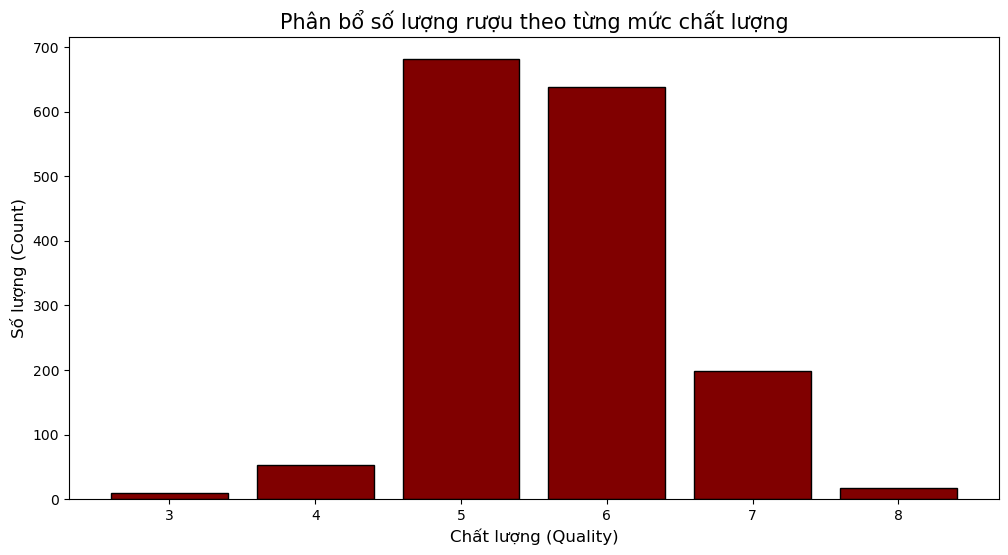

In [3]:
# ----- Case 2: Advanced 1 (Thêm thông tin cho biểu đồ) -----

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color='maroon', edgecolor='black')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Phân bổ số lượng rượu theo từng mức chất lượng', fontsize=15)
plt.xlabel('Chất lượng (Quality)', fontsize=12)
plt.ylabel('Số lượng (Count)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

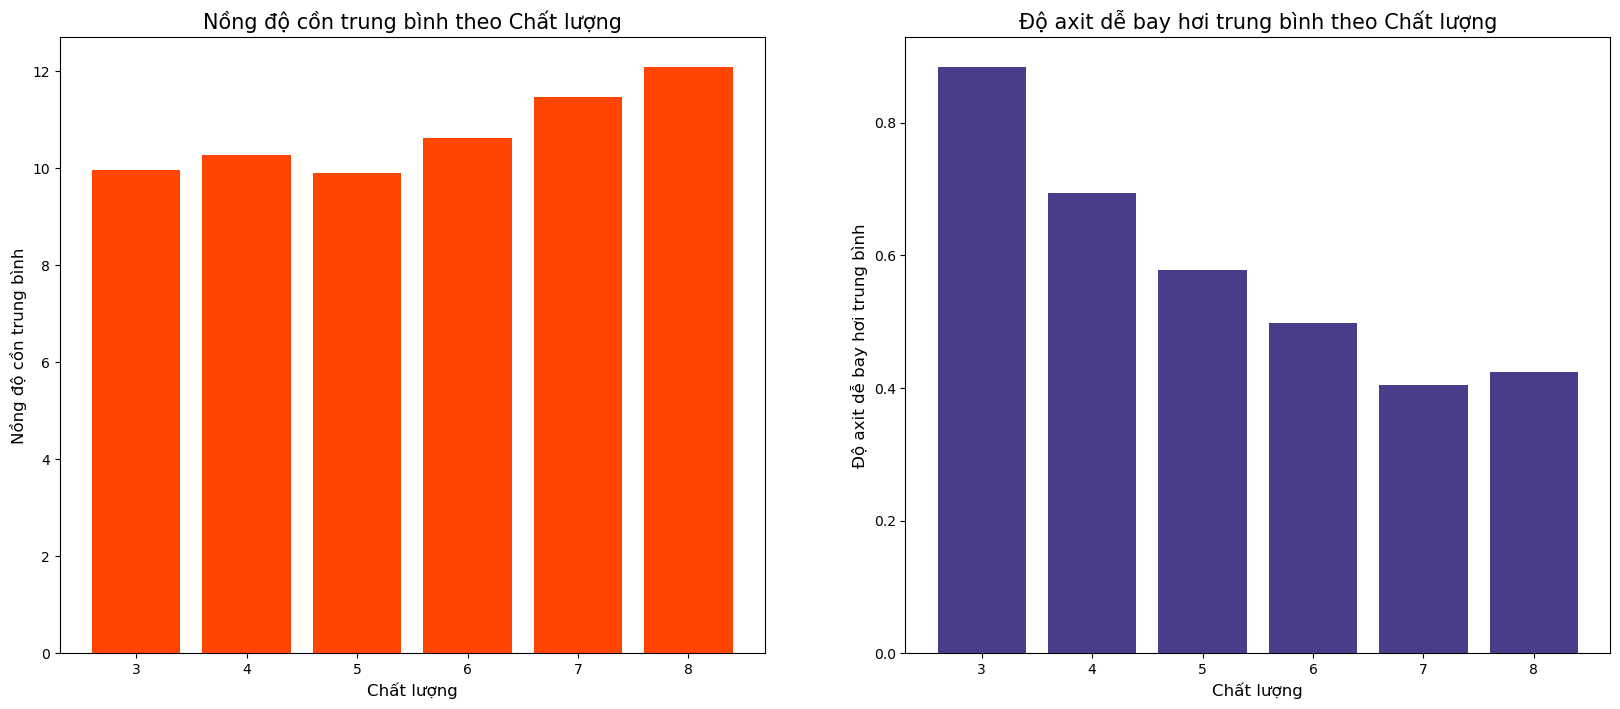

In [4]:
# ----- Case 3: Advanced 2 (Xem nhiều góc nhìn cùng lúc) -----

# Bước 1: Chuẩn bị dữ liệu (nhóm theo chất lượng và tính trung bình)
mean_values = df_wine.groupby('quality').mean()
x_quality = mean_values.index

# Bước 2: Tạo khung chứa 2 biểu đồ con
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Biểu đồ 1: Nồng độ cồn trung bình
y_alcohol = mean_values['alcohol']
ax[0].bar(x_quality, y_alcohol, color='orangered')
ax[0].set_title('Nồng độ cồn trung bình theo Chất lượng', fontsize=15)
ax[0].set_xlabel('Chất lượng', fontsize=12)
ax[0].set_ylabel('Nồng độ cồn trung bình', fontsize=12)

# Biểu đồ 2: Độ axit dễ bay hơi trung bình
y_acidity = mean_values['volatile acidity']
ax[1].bar(x_quality, y_acidity, color='darkslateblue')
ax[1].set_title('Độ axit dễ bay hơi trung bình theo Chất lượng', fontsize=15)
ax[1].set_xlabel('Chất lượng', fontsize=12)
ax[1].set_ylabel('Độ axit dễ bay hơi trung bình', fontsize=12)

plt.show()

### 3. Trực quan hóa dữ liệu với thư viện Seaborn
Bây giờ, chúng ta sẽ thực hiện lại các tác vụ tương tự bằng Seaborn để so sánh.

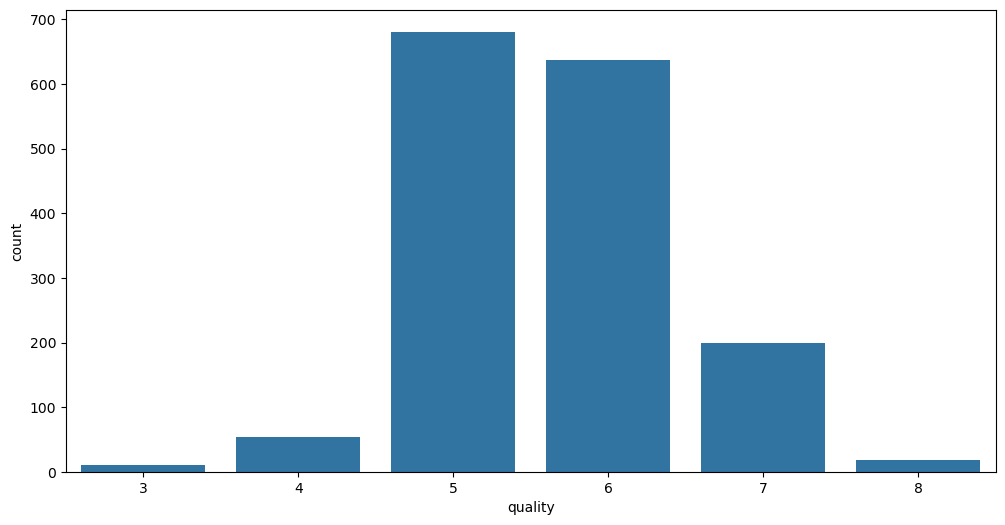

In [6]:
# ----- Case 1: Basic -----
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=df_wine)
plt.show()

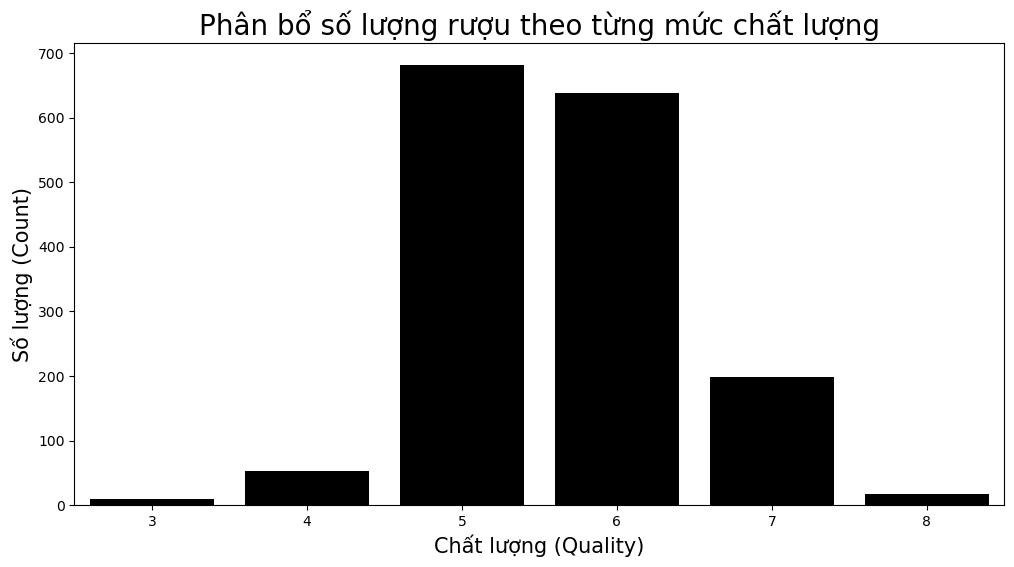

In [9]:
# ----- Case 2: Advanced 1 -----
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='quality', data=df_wine,color='black')

# Dùng cú pháp của Matplotlib để tùy chỉnh
ax.set_xlabel('Chất lượng (Quality)', fontsize=15)
ax.set_ylabel('Số lượng (Count)', fontsize=15)
ax.set_title('Phân bổ số lượng rượu theo từng mức chất lượng', fontsize=20)
plt.show()

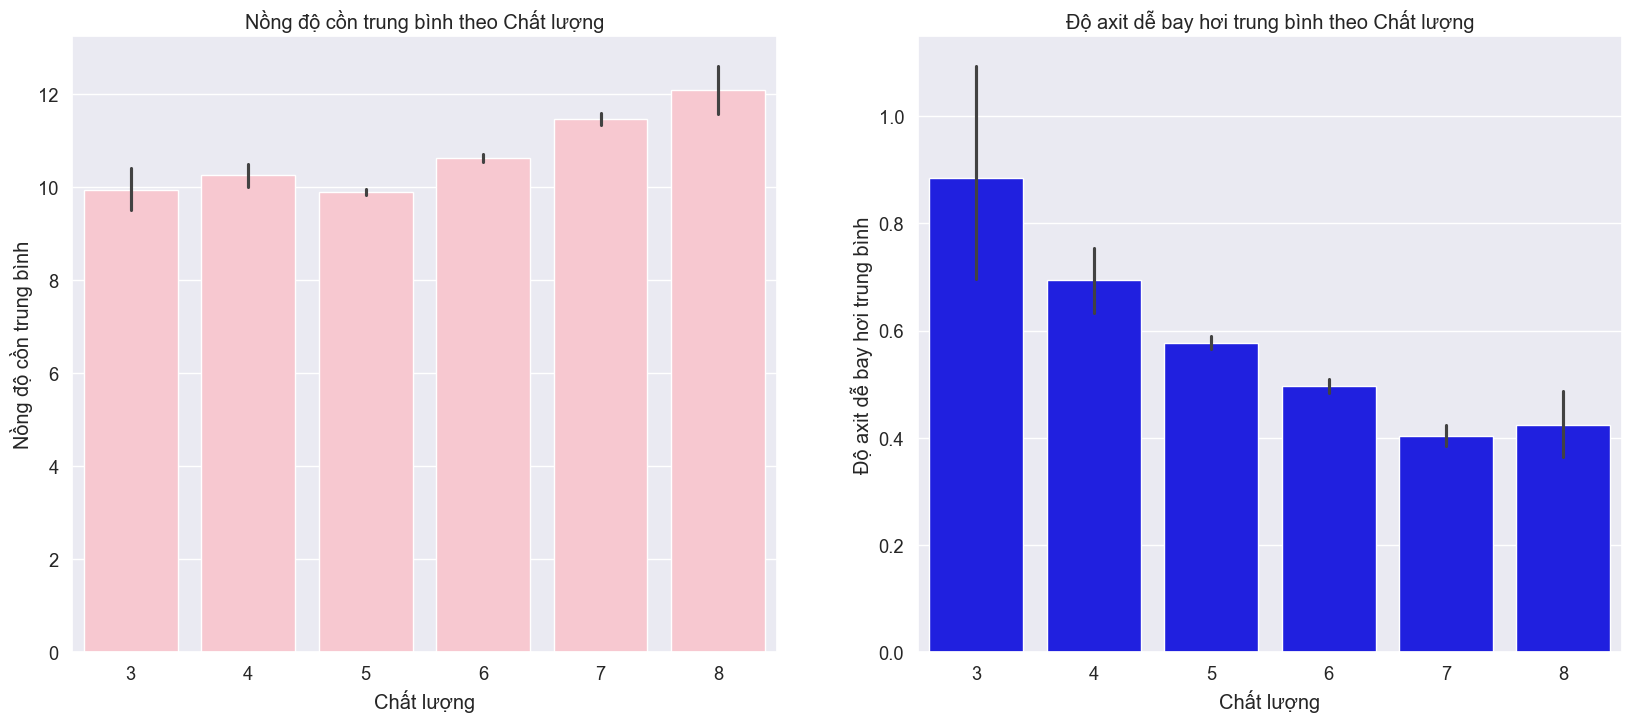

In [11]:
# ----- Case 3: View multiple perspectives at once -----
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.set(font_scale=1.2) # Tăng kích thước font chữ chung cho Seaborn

# Biểu đồ 1: Nồng độ cồn trung bình
ax1 = sns.barplot(x='quality', y='alcohol', data=df_wine, ax=ax[0], color='pink')
ax1.set_xlabel('Chất lượng')
ax1.set_ylabel('Nồng độ cồn trung bình')
ax1.set_title('Nồng độ cồn trung bình theo Chất lượng')

# Biểu đồ 2: Độ axit dễ bay hơi trung bình
ax2 = sns.barplot(x='quality', y='volatile acidity', data=df_wine, ax=ax[1], color='blue')
ax2.set_xlabel('Chất lượng')
ax2.set_ylabel('Độ axit dễ bay hơi trung bình')
ax2.set_title('Độ axit dễ bay hơi trung bình theo Chất lượng')

plt.show()

## Kết thúc